# Simulations

This section is intended to create simulated traces of reader/card communication and to introduce noise similarly to having a blocking card in the reader's range.
Simulations can also be used to test the demodulator.

In [1]:
from common_imports import *
from data_const import *

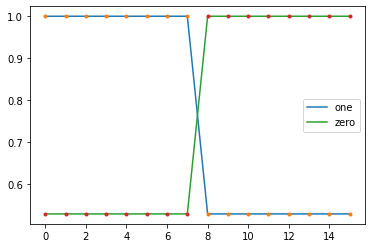

1000100000011011010000000001


In [5]:
amp_max = 1
tag_amp_min = 0.53
tag_amplitude = amp_max-tag_amp_min

# 16 samples for -. = 0 or .- = 1
one_signal = np.zeros(16)
one_signal[:8] = amp_max
one_signal[8:] = amp_max - tag_amplitude
plt.plot(one_signal, label='one')
plt.plot(one_signal, '.')

zero_signal = np.zeros(16)
zero_signal[:8] = amp_max - tag_amplitude
zero_signal[8:] = amp_max
plt.plot(zero_signal, label='zero')
plt.plot(zero_signal, '.')
plt.legend()
plt.show()

rf_signal = np.ones(16) * amp_max
no_signal = np.zeros(16)

# 0x08 0xb6 0xdd
content = [0x08, 0xb6, crc_a([0x08, 0xb6])[1]]

bit_content = ''
for x in content:
    c = format(x,'0>8b')[::-1]
    bit_content += c
    parity_bit = "1" if c.count("1") % 2 == 0 else "0"
    bit_content += parity_bit
bit_content = "1" + bit_content # START BIT
print(bit_content) # e.g. 1000100000011011010101110111

card_response_str = '****%s*****' % bit_content
# card_response_str = '****%s*****___' % bit_content
card_response = []
for k in range(len(card_response_str)):
    x = card_response_str[k]
    # INVERTED ZERO AND ONE!
    if x == '0':
        card_response.append(one_signal)
    elif x == '1':
        card_response.append(zero_signal)
    elif x == '_':
        card_response.append(no_signal)
    else:
        card_response.append(rf_signal)
card_response = np.array(card_response).flatten()


In [6]:
tag_amp_min

0.53

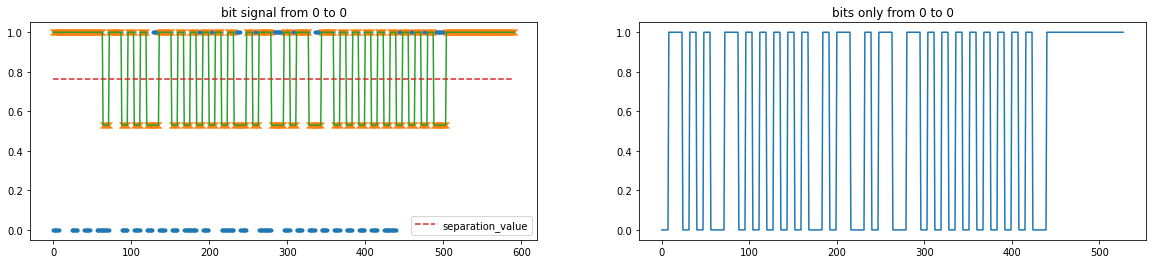

(0) <= 08 b6 00 - PA: OK OK OK , bits: S000100000011011010000000001E


'08 b6 00 '

In [8]:
NfcSignal.perform_demodulation(card_response, demodulate_device=Device.TAG, device_flag=Device.TAG, show_plots=True)

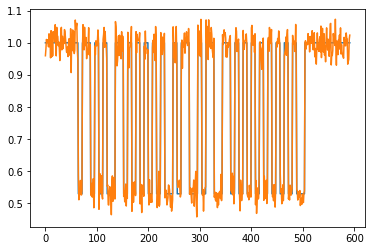

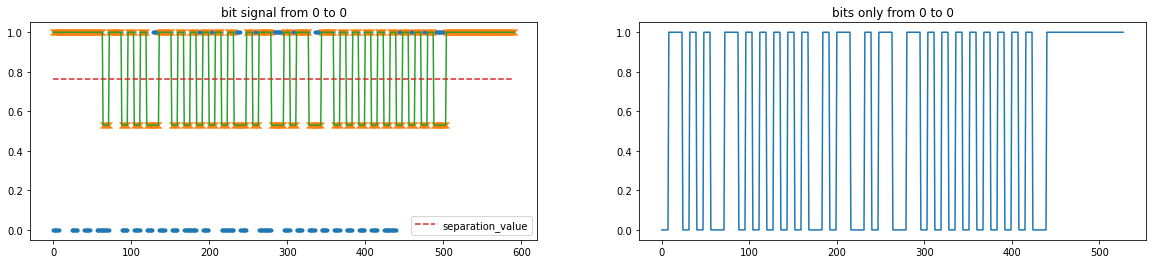

(0) <= 08 b6 00 - PA: OK OK OK , bits: S000100000011011010000000001E


'08 b6 00 '

In [9]:
# add noise to the signal
wgn = np.random.normal(loc=0, scale=0.03137763, size=card_response.size)
plt.plot(card_response)
plt.plot(card_response+wgn)
NfcSignal.perform_demodulation(card_response, demodulate_device=Device.TAG, device_flag=Device.TAG, show_plots=True)

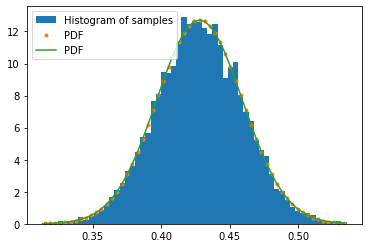

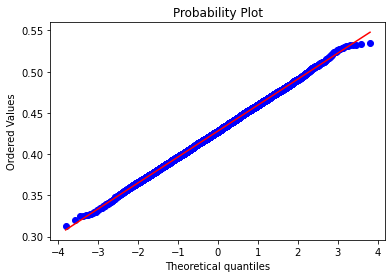

In [10]:
# loc = mu, scale = sigma
wgn = np.random.normal(loc=0.42795578, scale=0.03137763, size=10000)

# Sample from a normal distribution using numpy's random number generator
bins = np.linspace(np.min(wgn), np.max(wgn), 60)

bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers,loc=0.42795578, scale=0.03137763)

plt.figure(figsize=(6, 4))
_,_,_ = plt.hist(wgn, bins, label="Histogram of samples", density=True)
plt.plot(bin_centers, pdf, '.', label="PDF")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

stats.probplot(wgn, plot=plt) # mixture of two normal distributions! (blck card), the sum of two normals (central limit theorem) is still a normal!
plt.show()